In [8]:
import pandas as pd
file_path="C:/Users/91962/Documents/phase3.csv" 
df = pd.read_csv(file_path)
print(df.head())


   Unnamed: 0        Date  Q-P1  Q-P2  Q-P3  Q-P4      S-P1      S-P2  \
0           0  13-06-2010  5422  3725   576   907  17187.74  23616.50   
1           1  14-06-2010  7047   779  3578  1574  22338.99   4938.86   
2           2  15-06-2010  1572  2082   595  1145   4983.24  13199.88   
3           3  16-06-2010  5657  2399  3140  1672  17932.69  15209.66   
4           4  17-06-2010  3668  3207  2184   708  11627.56  20332.38   

       S-P3      S-P4  
0   3121.92   6466.91  
1  19392.76  11222.62  
2   3224.90   8163.85  
3  17018.80  11921.36  
4  11837.28   5048.04  


In [9]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Unnamed: 0    0
Date          0
Q-P1          0
Q-P2          0
Q-P3          0
Q-P4          0
S-P1          0
S-P2          0
S-P3          0
S-P4          0
dtype: int64


In [10]:
print("Data Types:\n", df.dtypes)

Data Types:
 Unnamed: 0      int64
Date           object
Q-P1            int64
Q-P2            int64
Q-P3            int64
Q-P4            int64
S-P1          float64
S-P2          float64
S-P3          float64
S-P4          float64
dtype: object


In [11]:
print("Summary Statistics:\n", df.describe())

Summary Statistics:
         Unnamed: 0         Q-P1         Q-P2         Q-P3         Q-P4  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean   2299.500000  4121.849130  2130.281522  3145.740000  1123.500000   
std    1328.049949  2244.271323  1089.783705  1671.832231   497.385676   
min       0.000000   254.000000   251.000000   250.000000   250.000000   
25%    1149.750000  2150.500000  1167.750000  1695.750000   696.000000   
50%    2299.500000  4137.000000  2134.000000  3202.500000  1136.500000   
75%    3449.250000  6072.000000  3070.250000  4569.000000  1544.000000   
max    4599.000000  7998.000000  3998.000000  6000.000000  2000.000000   

               S-P1          S-P2          S-P3          S-P4  
count   4600.000000   4600.000000   4600.000000   4600.000000  
mean   13066.261743  13505.984848  17049.910800   8010.555000  
std     7114.340094   6909.228687   9061.330694   3546.359869  
min      805.180000   1591.340000   1355.000000   1782.5

In [12]:
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns

In [13]:
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [20]:
df['Day'] = df['Date'].apply(lambda x: x.split('-')[0])
df['Month'] = df['Date'].apply(lambda x: x.split('-')[1])
df['Year'] = df['Date'].apply(lambda x: x.split('-')[2])
df

Unnamed: 0        Date  Q-P1  Q-P2  Q-P3  Q-P4      S-P1      S-P2  \
0              0  13-06-2010  5422  3725   576   907  17187.74  23616.50   
1              1  14-06-2010  7047   779  3578  1574  22338.99   4938.86   
2              2  15-06-2010  1572  2082   595  1145   4983.24  13199.88   
3              3  16-06-2010  5657  2399  3140  1672  17932.69  15209.66   
4              4  17-06-2010  3668  3207  2184   708  11627.56  20332.38   
...          ...         ...   ...   ...   ...   ...       ...       ...   
4595        4595  30-01-2023  2476  3419   525  1359   7848.92  21676.46   
4596        4596  31-01-2023  7446   841  4825  1311  23603.82   5331.94   
4597        4597  01-02-2023  6289  3143  3588   474  19936.13  19926.62   
4598        4598  02-02-2023  3122  1188  5899   517   9896.74   7531.92   
4599        4599  03-02-2023  1234  3854  2321   406   3911.78  24434.36   

          S-P3      S-P4 Day Month  Year  
0      3121.92   6466.91  13    06  2010  
1     19392.76  11222.62  14    06  2010  
2      3224.90   8163.85  15    06  2010  
3     17018.80  11921.36  16    06  2010  
4     11837.28   5048.04  17    06  2010  
...        ...       ...  ..   ...   ...  
4595   2845.50   9689.67  30    01  2023  
4596  26151.50   9347.43  31    01  2023  
4597  19446.96   3379.62  01    02  2023  
4598  31972.58   3686.21  02    02  2023  
4599  12579.82   2894.78  03    02  2023  

[4600 rows x 13 columns]

In [21]:
data_reduced = df.query("Year != '2010' and Year != '2023'")

In [22]:
data = df.drop(columns=['Unnamed: 0'])

In [23]:
#Create a function that allows us to plot a bar chart for the 4 products
def plot_bar_chart(df, columns, stri, str1, val):
    # Aggregate sales for each product by year, by sum or mean
    if val == 'sum':
        sales_by_year = df.groupby('Year')[columns].sum().reset_index()
    elif val == 'mean':
        sales_by_year = df.groupby('Year')[columns].mean().reset_index()

    # Melt the data to make it easier to plot
    sales_by_year_melted = pd.melt(sales_by_year, id_vars='Year', value_vars=columns, var_name='Product', value_name='Sales')

    # Create a bar chart
    plt.figure(figsize=(20,4))
    sns.barplot(data=sales_by_year_melted, x='Year', y='Sales', hue='Product') #,palette="cividis")
    plt.xlabel('Year')
    plt.ylabel(stri)
    plt.title(f'{stri} by {str1}')
    plt.xticks(rotation=45)
    plt.show()

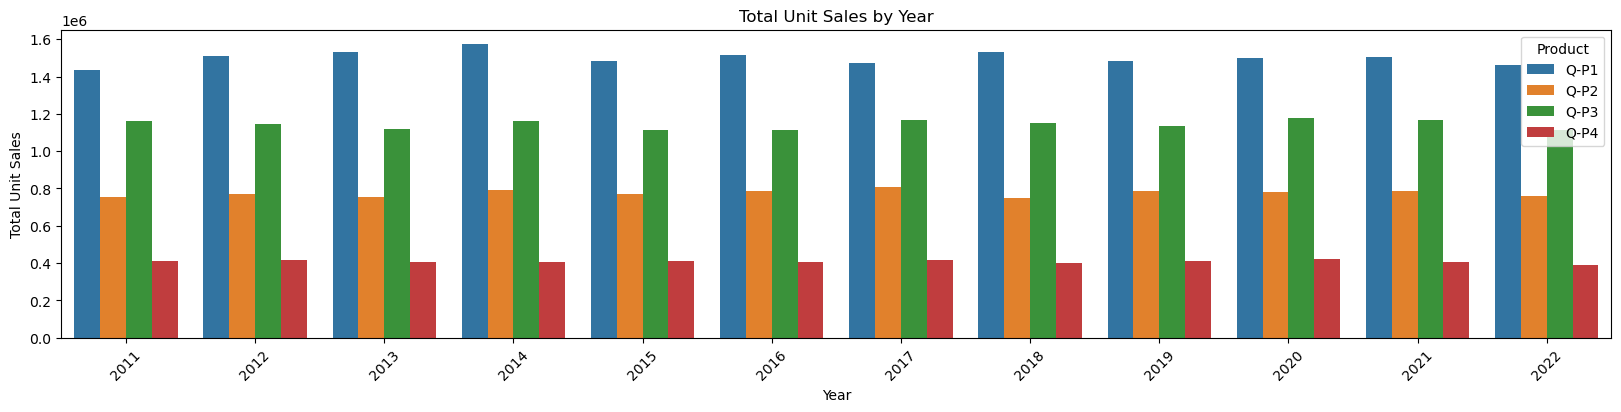

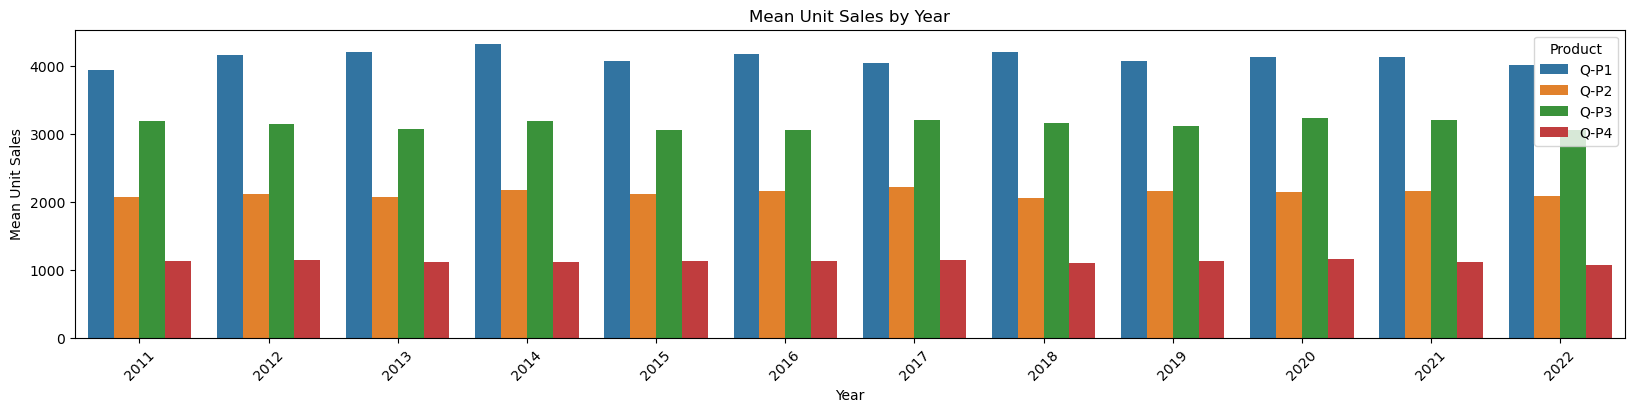

In [24]:
plot_bar_chart(data_reduced, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'],'Total Unit Sales', 'Year', 'sum')

plot_bar_chart(data_reduced, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'],'Mean Unit Sales', 'Year', 'mean')